In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam, Adamax
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Read the data

In [ ]:
# Reading CSV file
train=pd.read_csv("/content/gdrive/MyDrive/emnist_byclass_train.csv").astype('float32')
train=np.array(train)
test=pd.read_csv("/content/gdrive/MyDrive/emnist_byclass_test.csv").astype('float32')
test=np.array(test)


#for i in range(33737):
  #train=np.append(train,[test[0]],axis=0)
  #test=np.delete(test,(0),axis=0)


# There are in total 814255 images each of size 28 X 28
# Each row in the CSV file contains one image flattern in a vector of size 784
print("train_data: ")
print()
print(train)

print()
print()

print("test_data: ")
print()
print(test)

train_data: 

[[36.  0.  0. ...  0.  0.  0.]
 [ 6.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  0.  0.  0.]
 ...
 [ 5.  0.  0. ...  0.  0.  0.]
 [11.  0.  0. ...  0.  0.  0.]
 [22.  0.  0. ...  0.  0.  0.]]


test_data: 

[[36.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  0. ...  0.  0.  0.]
 ...
 [28.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 5.  0.  0. ...  0.  0.  0.]]


# Shuffling the data

In [ ]:
train=shuffle(train)
test=shuffle(test)

# Split the data into image and their labels

In [ ]:
# As it is seen that '0' column contains labels (0,61).
# Split data into images and their labels
train_x=train[:,1:785]
train_y=train[:,0]
test_x=test[:,1:785]
test_y=test[:,0]

print("train_x: ", train_x.shape)
print()
print(train_x)
print()

print("test_x",test_x.shape)
print()
print(test_x)
print()

print("train_y",train_y.shape)
print()
print(train_y)
print()

print("test_y",test_y.shape)
print()
print(test_y)
print()

train_x:  (697931, 784)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

test_x (116322, 784)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

train_y (697931,)

[ 3.  1. 23. ... 33.  9.  9.]

test_y (116322,)

[10.  3. 15. ... 15.  0.  8.]



# Data pre processing


> *Reverse and rotate the data*







In [ ]:
# since the data in emnist by class is rotated and reversed
for i in range(697931):
  image=train_x[i]
  image=np.array(image)
  image=np.reshape(image,(28,28))
  image=np.transpose(image)
  image=image.flatten()
  train_x[i]=image

for i in range(116322):
  image=test_x[i]
  image=np.array(image)
  image=np.reshape(image,(28,28))
  image=np.transpose(image)
  image=image.flatten()
  test_x[i]=image

In [ ]:
print(train_x.shape)
print(test_x.shape)

(697931, 784)
(116322, 784)


# Plotting the number of alphabets and digits in the dataset

train_y_integer:  [ 3  1 23 ... 33  9  9]
test_y_integer:  [10  3 15 ... 15  0  8]


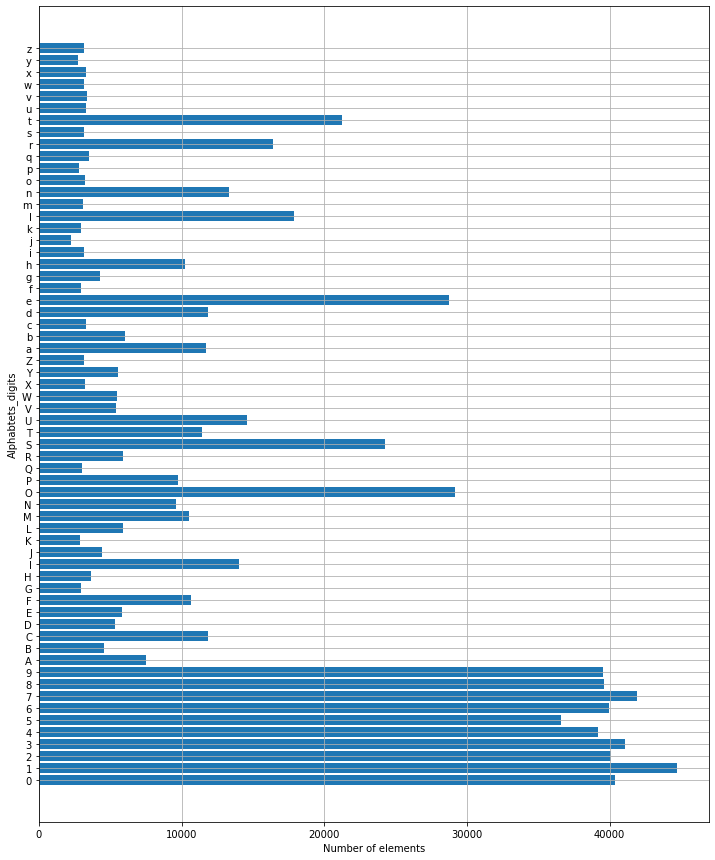

In [ ]:
# We create a dictionary word_dict to map the integer values with the characters.
word_dict = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',
             16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N', 24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',
             31:'V',32:'W',33:'X',34:'Y',35:'Z',36:'a',37:'b',38:'c',39:'d',40:'e',41:'f',42:'g',43:'h',44:'i',45:'j',
             46:'k',47:'l',48:'m',49:'n', 50:'o',51:'p',52:'q',53:'r',54:'s',55:'t',56:'u',57:'v',58:'w',59:'x',60:'y',
             61:'z'}


# All the labels are present in the form of floating point values, that we convert to integer values.
# y_integer is a vector of 'integer values of y'
train_y_integer = np.int0(train_y)
test_y_integer = np.int0(test_y)
print("train_y_integer: ", train_y_integer)
print("test_y_integer: ", test_y_integer)


# 'count' is vector of size 26 which keeps count of how many times is that character present in dataset
count = np.zeros(62, dtype='int')
for i in train_y_integer:
    count[i] +=1
for i in test_y_integer:
    count[i] +=1

alphabets_digits = ['0','1','2','3','4','5','6','7','8','9',
                    'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
                    'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


# Plotting the number of each alphabet in the dataset
fig, ax = plt.subplots(1,1, figsize=(12,15))
ax.barh(alphabets_digits, count)   #  'barh' is used to make a horizontal bar plot
plt.xlabel("Number of elements")
plt.ylabel("Alphabtets_digits")
plt.grid()
plt.show()

# Reshaping the Train and Test data

In [ ]:
# Reshaping the training & test DATA so that it can be put in the model
final_train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
print("New shape of train data: ", final_train_x.shape)

final_test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
print("New shape of train data: ", final_test_x.shape)
print()


# Reshaping the training & test LABELS so that it can be put in the model
   # to_categorial converts a class vector(integers) to binary class matrix
   # a = to_categorical([0, 1, 1, 3, 2], num_classes=4)
   # print(a)
   # [[1. 0. 0. 0.]
   # [0. 1. 0. 0.]
   # [0. 1. 0. 0.]
   # [0. 0. 0. 1.]
   # [0. 0. 1. 0.]]
final_train_y = to_categorical(train_y, num_classes = 62, dtype='int')  # numclass=62 because labels have values from 0 to 61 only
print("New shape of train labels: ", final_train_y.shape)

final_test_y = to_categorical(test_y, num_classes = 62, dtype='int')    # numclass=62 because labels have values from 0 to 61 only
print("New shape of test labels: ", final_test_y.shape)

New shape of train data:  (697931, 28, 28, 1)
New shape of train data:  (116322, 28, 28, 1)

New shape of train labels:  (697931, 62)
New shape of test labels:  (116322, 62)


# CNN Model

In [ ]:
# CNN model designed for training the model over the training dataset
model = Sequential()


# filters: filter consist of kernels
# activation: activation function to use
#             activation = relu (rectified linear activation function) 
#                          that will output the input directly if it is positive, otherwise, it will output zero.
# padding: one of "valid" or "same"  
#          valid: means no padding. 
#          same: results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width as the input.
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))


model.add(Flatten())


# Fully connected layers
model.add(Dense(256,activation ="relu"))
model.add(Dense(512,activation ="relu"))

# Dropout layer
model.add(Dropout(0.5))

# Softmax function for classification
model.add(Dense(62,activation ="softmax"))

# Compiling & Fitting the model

In [ ]:
# Compiling and fitting the model
model.compile(optimizer = Adamax(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(final_train_x, final_train_y, epochs=2,  validation_data = (final_test_x,final_test_y))

Epoch 1/20
21811/21811 [==============================] - 126s 6ms/step - loss: 0.3321 - accuracy: 0.8768 - val_loss: 0.3476 - val_accuracy: 0.8720
Epoch 2/20
21811/21811 [==============================] - 127s 6ms/step - loss: 0.3226 - accuracy: 0.8785 - val_loss: 0.3440 - val_accuracy: 0.8722
Epoch 3/20
21811/21811 [==============================] - 128s 6ms/step - loss: 0.3171 - accuracy: 0.8803 - val_loss: 0.3456 - val_accuracy: 0.8726
Epoch 4/20
21811/21811 [==============================] - 127s 6ms/step - loss: 0.3134 - accuracy: 0.8812 - val_loss: 0.3456 - val_accuracy: 0.8724
Epoch 5/20
21811/21811 [==============================] - 138s 6ms/step - loss: 0.3106 - accuracy: 0.8824 - val_loss: 0.3450 - val_accuracy: 0.8726
Epoch 6/20
21811/21811 [==============================] - 126s 6ms/step - loss: 0.3057 - accuracy: 0.8843 - val_loss: 0.3477 - val_accuracy: 0.8725
Epoch 7/20
21811/21811 [==============================] - 127s 6ms/step - loss: 0.2996 - accuracy: 0.8857 - val_

# Model summary

In [ ]:
model.summary()
model.save(r'HCR_English.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               8

# Model accuracy and Model loss

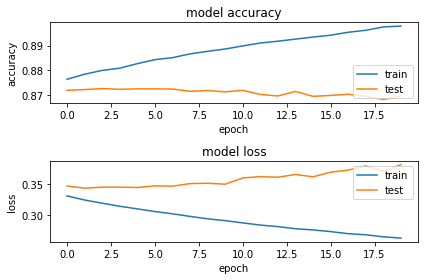

In [ ]:
# Plot accuracy vs epoch
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

# Plot loss vs epoch
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

# No. of Correct and Incorrect predictions

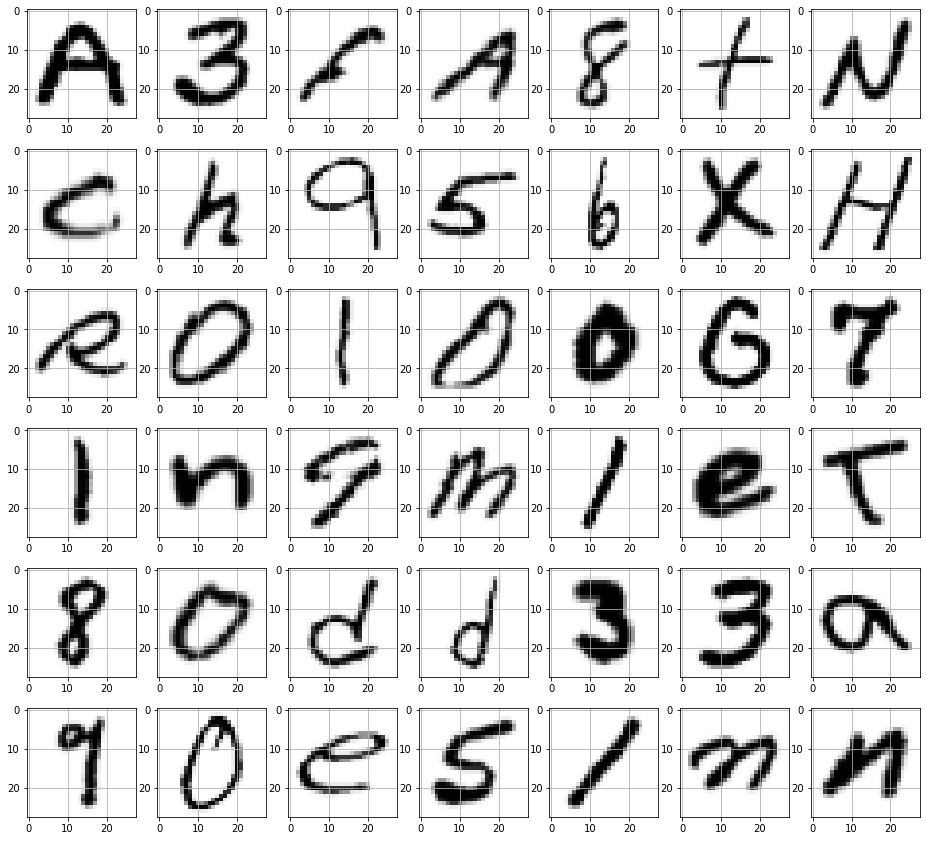

In [ ]:
# Prediction on test dataset
fig, axes = plt.subplots(6,7, figsize=(16,15))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(final_test_x[i], (28,28))
    #img=np.transpose(img)
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(final_test_y[i])]
    #ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
predicted_classes = model.predict_classes(final_test_x)


# find test images predicted correctly
correct = np.nonzero(predicted_classes == test_y_integer)[0]


# find test images predicted correctly
incorrect = np.nonzero(predicted_classes != test_y_integer)[0]

print()
print("Corretly classified images: ", len(correct))
print("Incorretly classified images: ", len(incorrect))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Corretly classified images:  101153
Incorretly classified images:  15169


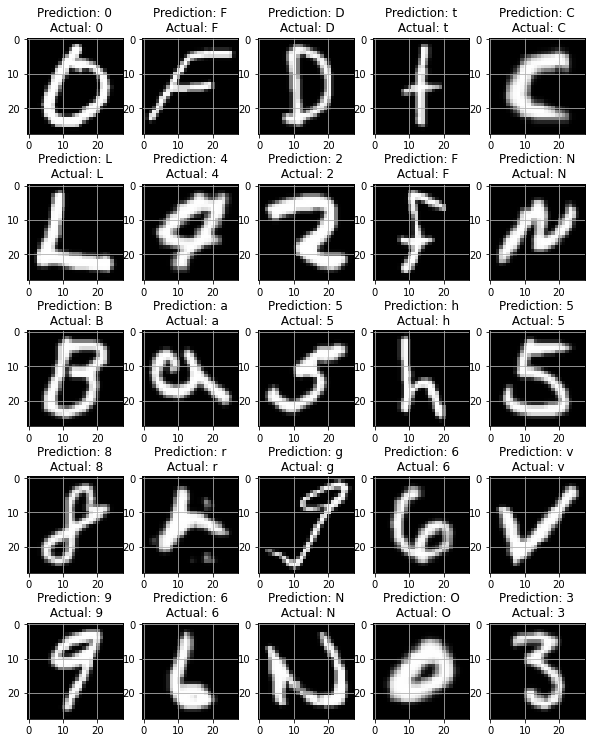

In [ ]:
# Printing few correctly predicting test images
fig, axes = plt.subplots(5,5, figsize=(10,13))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(final_test_x[correct[i]], (28,28))
    ax.imshow(img, cmap='gray')
    
    img = np.reshape(final_test_x[correct[i]], (1,28,28,1))
    pred=model.predict(img)
    ans=word_dict[np.argmax(pred)]
    actual=word_dict[test_y_integer[correct[i]]]
    ax.set_title("Prediction: "+ ans +
                 "\n Actual: "+ actual)
    ax.grid()

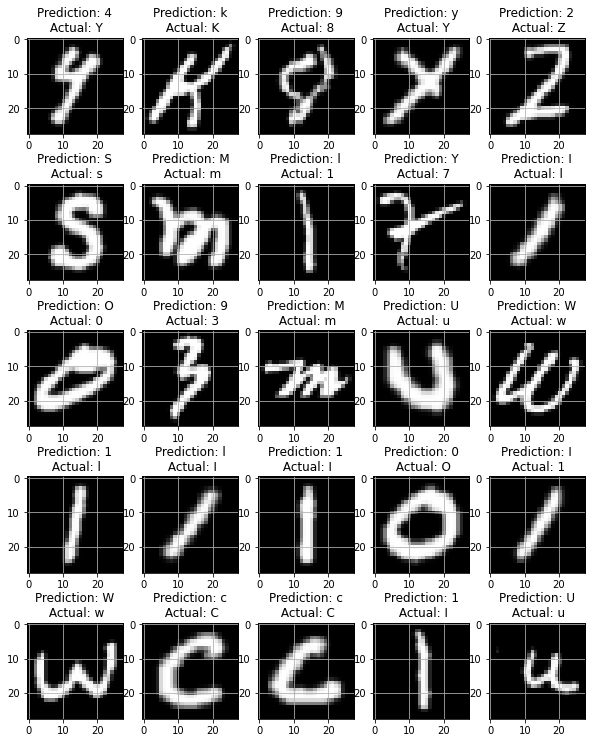

In [ ]:
# Printing few incorrectly predicting test images
fig, axes = plt.subplots(5,5, figsize=(10,13))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(final_test_x[incorrect[i]], (28,28))
    ax.imshow(img, cmap='gray')
    
    img = np.reshape(final_test_x[incorrect[i]], (1,28,28,1))
    pred=model.predict(img)
    ans=word_dict[np.argmax(pred)]
    actual=word_dict[test_y_integer[incorrect[i]]]
    ax.set_title("Prediction: "+ ans +
                 "\n Actual: "+ actual)
    ax.grid()

# Prediction on own data

In [ ]:
# Converting own image data into array
my_dir='/content/gdrive/MyDrive/own_english'
file_list=[]
own_data=[]

for root,dirs,files in os.walk(my_dir):
  for name in files:
    full_name=os.path.join(root,name)
    file_list.append(full_name)

for name in file_list:
  img_gray=cv2.imread(name,0)
  img_gray=cv2.resize(img_gray,(28,28))

  # Converting Gray scale image into binary
  # Syntax: 
  #   -> cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 
  # Parameters: 
  #   -> source: Input Image array (must be in Grayscale). 
  #   -> thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
  #   -> maxVal: Maximum value that can be assigned to a pixel. 
  #   -> thresholdingTechnique: The type of thresholding to be applied. 
  #      -> cv2.THRESH_BINARY: If pixel intensity is greater than the set threshold value then it is set to 255, else set to 0 (black).
  ret, img_binary=cv2.threshold(img_gray, 30, 255, cv2.THRESH_BINARY)

  # Inverting the background
  img=cv2.bitwise_not(img_binary)
  value=img.flatten()
  own_data.append(value)

own_data=np.array(own_data)
own_data=own_data.astype('float32')

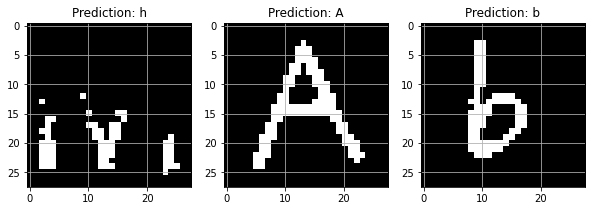

In [ ]:
# Prediction on own dataset
fig, axes = plt.subplots(1,3, figsize=(10,14))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(own_data[i], (28,28))
    ax.imshow(img, cmap='gray')
    
    data=np.reshape(own_data[i],(28,28))
    img = np.reshape(data, (1,28,28,1))
    pred=model.predict(img)
    ans=word_dict[np.argmax(pred)]
    ax.set_title("Prediction: "+ans)
    ax.grid()